In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("datas/adjustedMSCIeurope.xlsx")

In [3]:
data.head()

,Unnamed: 0,Ticker,Ticker Yahoo,Nom,Secteur,Equity class,Market Share,Weights,Valeur notionnelle,Actions,ISIN,Currency,Environment Score,Social Score,Governance Score,Total Score
0,0,NESN,NSRGY,NESTLE SA,Biens de consommation de base,Actions,"EUR 48 274 991,14",5.655122,48274991.14,420838,CH0038863350,CHF,8.60,10.80,4.70,24.00
1,1,ASML,ASML,ASML HOLDING NV,Technologie de l'informatioon,Actions,"EUR 34 906 428,20",4.093001,34906428.20,60802,NL0010273215,EUR,3.60,2.60,4.80,11.00
2,2,ROG,ROG.SW,ROCHE HOLDING PAR AG,Santé,Actions,"EUR 33 188 774,68",3.887140,33188774.68,104989,CH0012032048,CHF,2.48,11.54,9.52,23.53
3,3,MC,MC.PA,LVMH,Biens de consommation cycliques,Actions,"EUR 29 028 191,40",3.402761,29028191.40,41457,FR0000121014,EUR,0.76,5.93,5.67,12.37
4,4,NOVOB,NVO,NOVO NORDISK CLASS B,Santé,Actions,"EUR 28 242 417,87",3.305885,28242417.87,247375,DK0060534915,DKK,2.10,13.50,8.40,24.00


## The mean and median of the ESG score of the assets in the MSCI Europe index

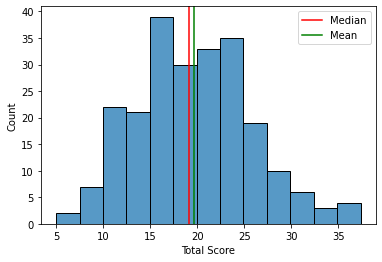

In [4]:
sns.histplot(data=data, x='Total Score')
plt.axvline(data['Total Score'].median(), color='red')
plt.axvline(data['Total Score'].mean(), color='green')
plt.legend(['Median', 'Mean'])
plt.show()

The median is slightly inferior to the mean, which means that the distribution of the ESG total score is skewed to the right. This means that there are a bit more of assets with a high ESG score.

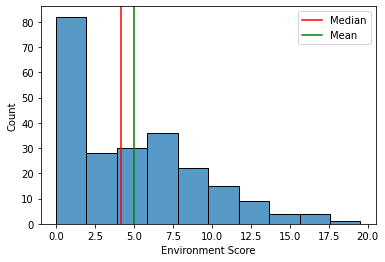

In [4]:
sns.histplot(data=data, x='Environment Score')
plt.axvline(data['Environment Score'].median(), color='red')
plt.axvline(data['Environment Score'].mean(), color='green')
plt.legend(['Median', 'Mean'])
plt.show()

The median of the ESG score of the assets in the MSCI Europe index is 3.5 and the mean at 5.

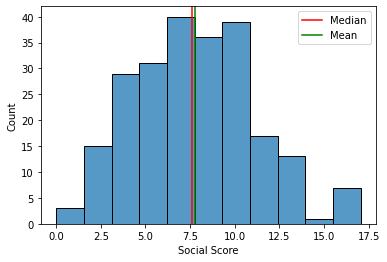

In [5]:
sns.histplot(data=data, x='Social Score')
plt.axvline(data['Social Score'].median(), color='red')
plt.axvline(data['Social Score'].mean(), color='green')
plt.legend(['Median', 'Mean'])
plt.show()

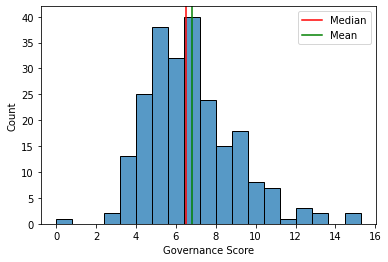

In [6]:
sns.histplot(data=data, x='Governance Score')
plt.axvline(data['Governance Score'].median(), color='red')
plt.axvline(data['Governance Score'].mean(), color='green')
plt.legend(['Median', 'Mean'])  
plt.show()

# Analysis by sector

In [11]:
sectors = data["Secteur"].unique()
n = len(sectors)

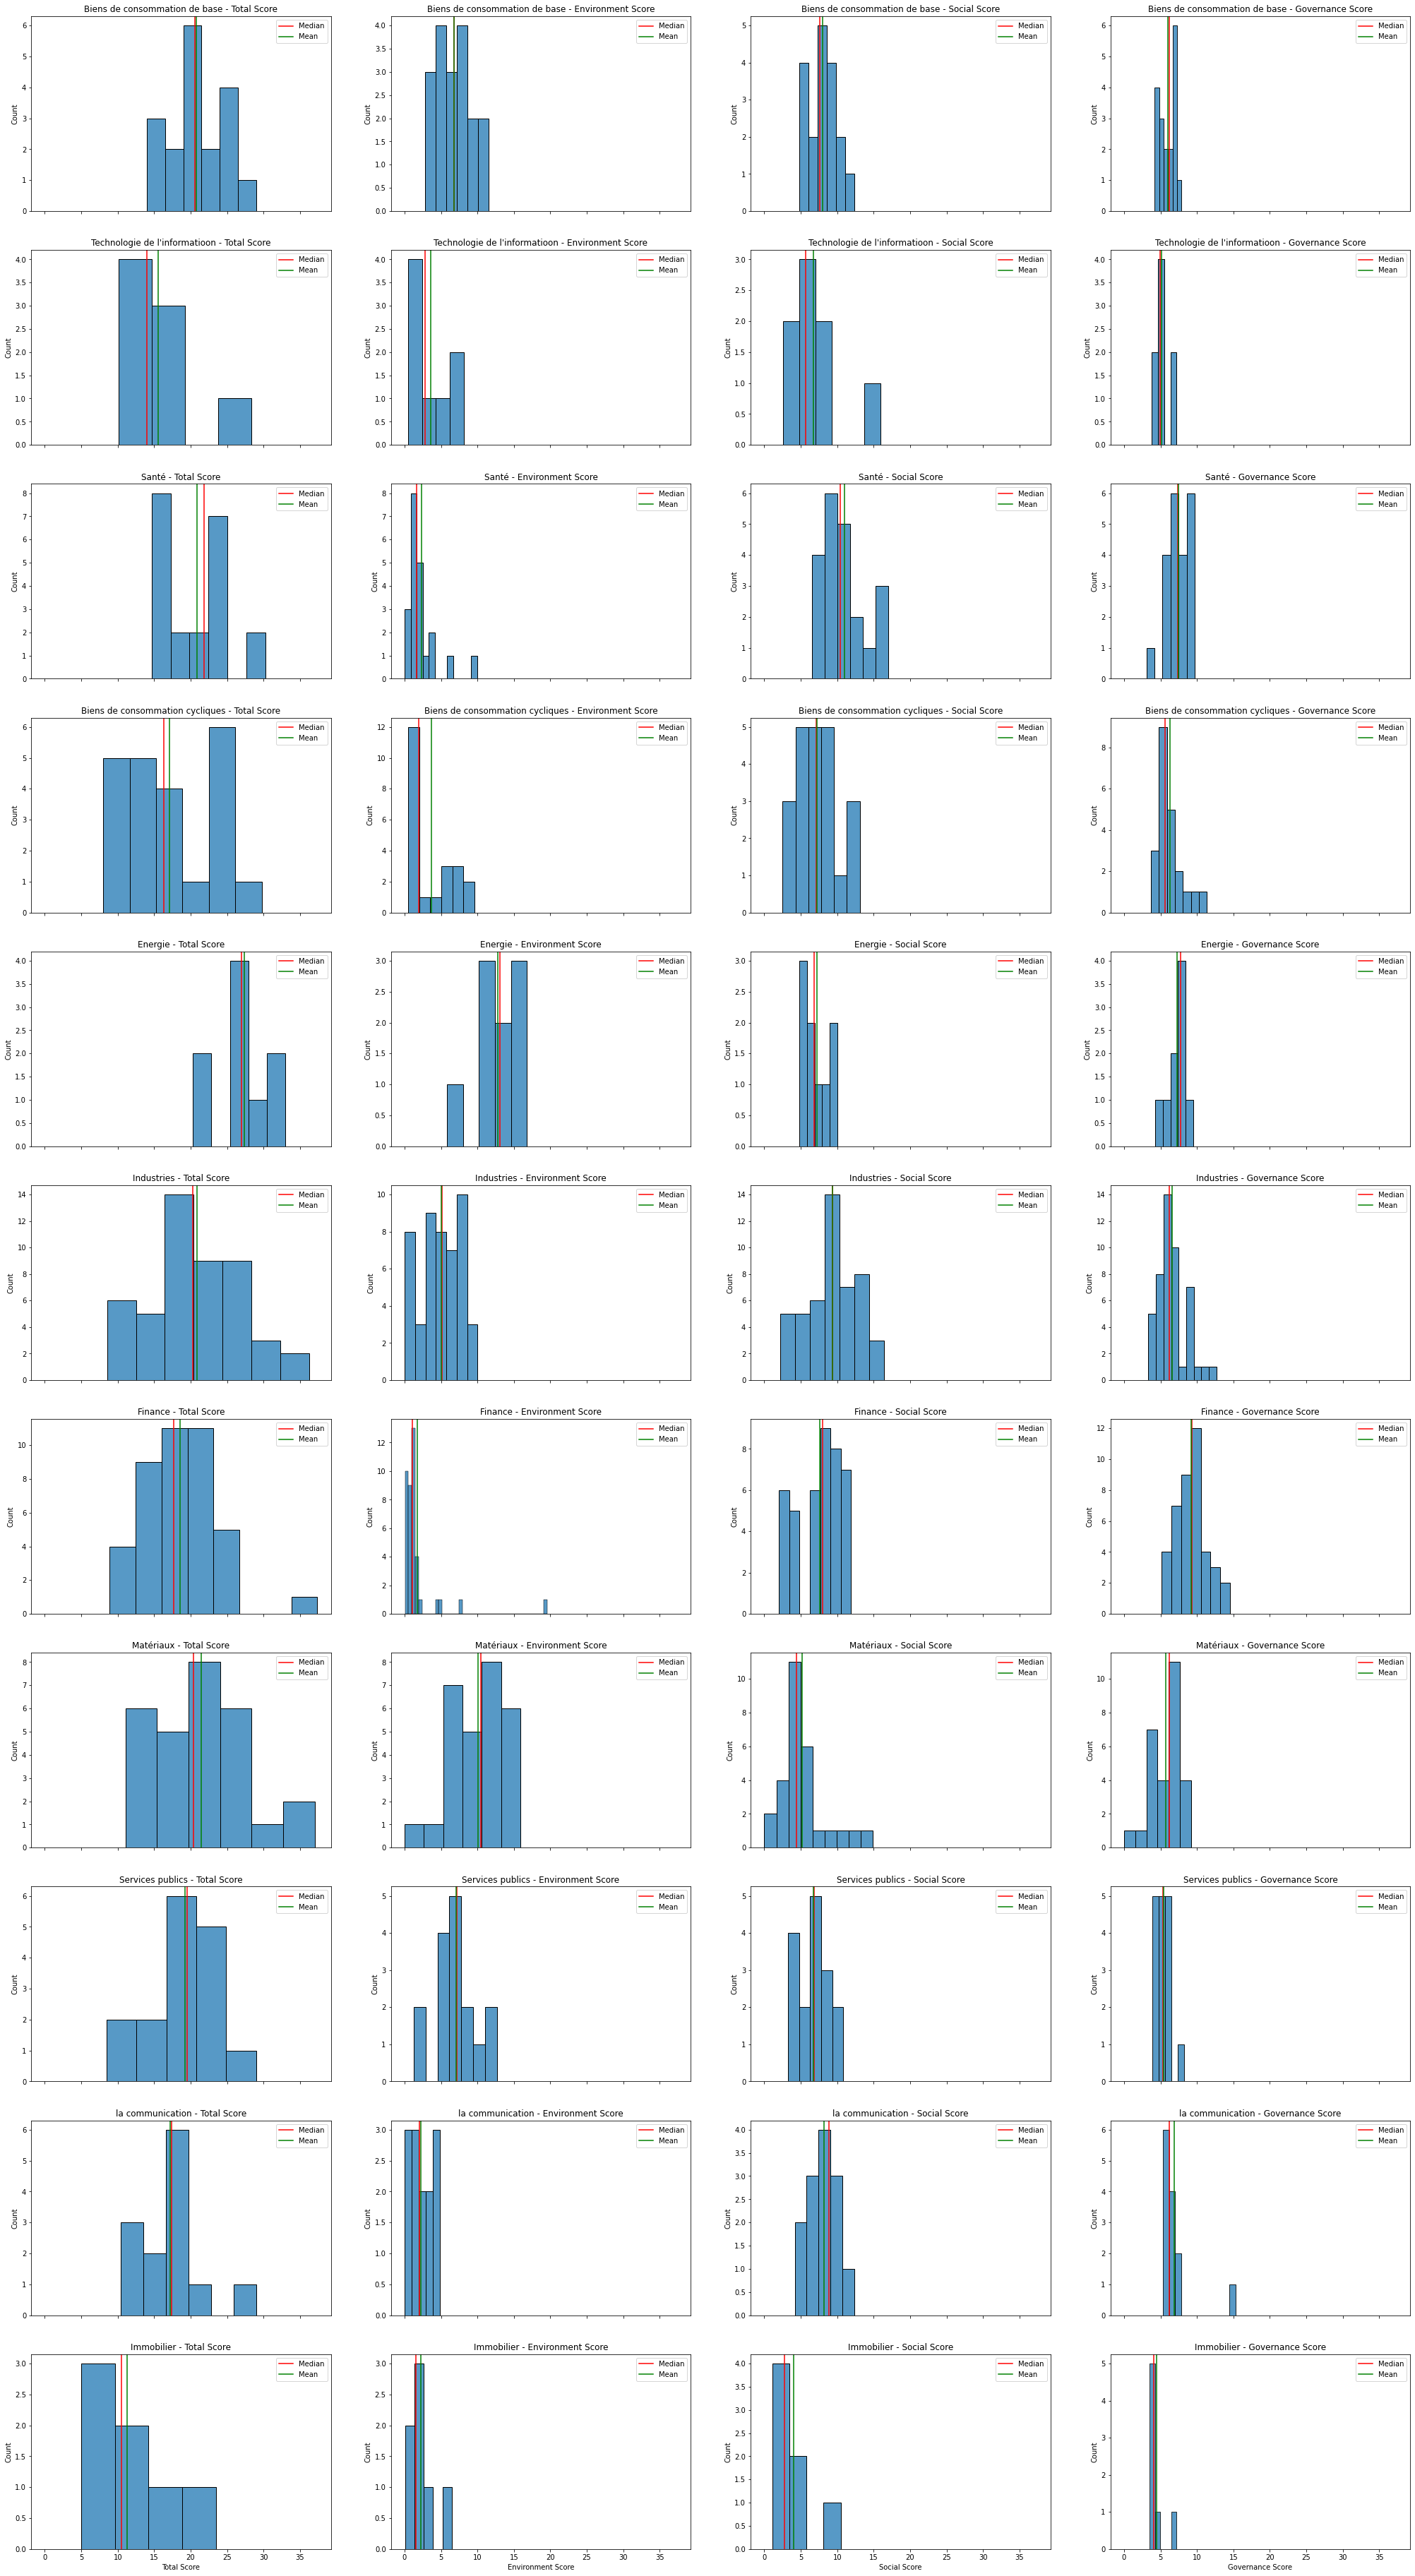

In [4]:
# mean and median for each sector for each type of score
fig, axs = plt.subplots(n, 4, figsize=(35, 6*n), sharex=True)
for k in range(n):
    data_sector = data[data["Secteur"] == sectors[k]]
    
    sns.histplot(data=data_sector, x='Total Score', ax=axs[k, 0])
    axs[k, 0].axvline(data_sector['Total Score'].median(), color='red')
    axs[k, 0].axvline(data_sector['Total Score'].mean(), color='green')
    axs[k, 0].legend(['Median', 'Mean'])
    
    sns.histplot(data=data_sector, x='Environment Score', ax=axs[k,1])
    axs[k,1].axvline(data_sector['Environment Score'].median(), color='red')
    axs[k,1].axvline(data_sector['Environment Score'].mean(), color='green')
    axs[k,1].legend(['Median', 'Mean'])
    
    sns.histplot(data=data_sector, x='Social Score', ax=axs[k, 2])
    axs[k, 2].axvline(data_sector['Social Score'].median(), color='red')
    axs[k, 2].axvline(data_sector['Social Score'].mean(), color='green')
    axs[k, 2].legend(['Median', 'Mean'])
    
    sns.histplot(data=data_sector, x='Governance Score', ax=axs[k, 3])
    axs[k, 3].axvline(data_sector['Governance Score'].median(), color='red')
    axs[k, 3].axvline(data_sector['Governance Score'].mean(), color='green')
    axs[k, 3].legend(['Median', 'Mean'])
    
    axs[k, 0].set_title(sectors[k] + " - Total Score")
    axs[k, 1].set_title(sectors[k] + " - Environment Score")
    axs[k, 2].set_title(sectors[k] + " - Social Score")
    axs[k, 3].set_title(sectors[k] + " - Governance Score")
    
plt.show()
    

About total score : 
- highest score : Energie, Industrie, Finance, Materiaux
- lowest score : technologie, immobillier

About Environment score :
- highest score : Energie, Materiels, Service Public
- lowest score : technologie de l'information, finance, communication, immobilier

About Social score :
- highest score : Industries, communication, services publics
- lowest score : technologie de l'information, materiaux

About Governance score :
- highest score : Energie, Finance
- lowest score : technologie de l'information, communication, immobillier, biens de consommation

# Selection

In [8]:
E_median = data["Environment Score"].median()
E_mean = data["Environment Score"].mean()
S_median = data["Social Score"].median()
S_mean = data["Social Score"].mean()
G_median = data["Governance Score"].median()
G_mean = data["Governance Score"].mean()
T_median = data["Total Score"].median()
T_mean = data["Total Score"].mean()

**First strategy** : take only the assets with ESG scores inferior to their respective medians.

In [7]:
strat1 = data["Ticker Yahoo"][(data["Environment Score"]<E_median) & (data["Social Score"]<S_median) & (data["Environment Score"]<G_median) & (data["Total Score"]<T_median)].values
print(f"Notre portfeuille va contenir au total {len(strat1)} actions.")
strat1

Notre portfeuille va contenir au total 56 actions.


array(['ASML', 'MC.PA', 'NVS', 'SAP', 'CFR.SW', 'ABB', 'RMS.PA', 'KER.PA',
       'RI.PA', 'ISP.MI', 'CAP.PA', 'IDEXF', '6S=F', 'AMS.MC', 'SAMPO.HE',
       'ADDYY', 'LR.PA', 'G.MI', 'VNA.DE', 'KNEBV.HE', 'CABK.MC',
       'PUB.PA', 'COLO-B.CO', 'SHB-A.ST', 'SCMN.SW', 'KBC.BR', 'HNR1.DE',
       'QGEN', 'BNR.DE', 'TRN.MI', 'EBS.VI', 'AENA.MC', 'EXO.AS',
       'GBLC.CN', 'RDFN', 'BVI.PA', 'TELIA.ST', 'RAND.AS', 'ZAL.DE',
       'SIG', 'VIV.PA', 'PNDORA.CO', 'JMT.LS', 'WFDRX', 'MB.MI', 'ATL.MI',
       'LI.PA', 'BOL.PA', 'DIE.BR', 'GFC.PA', 'SECU-B.ST', 'IDVA.SG',
       'FR.PA', 'LBGUF', 'COV.PA', 'MF.PA'], dtype=object)

**Second strategy** : take only the assets with ESG scores inferior to their respective means.

In [9]:
strat2 = data["Ticker Yahoo"][(data["Environment Score"]<E_mean) & (data["Social Score"]<S_mean) & (data["Environment Score"]<G_mean) & (data["Total Score"]<T_mean)].values
print(f"Notre portfeuille va contenir au total {len(strat2)} actions.")
strat2

Notre portfeuille va contenir au total 62 actions.


array(['ASML', 'MC.PA', 'NVS', 'SAP', 'OR.PA', 'CFR.SW', 'ABB', 'RMS.PA',
       'KER.PA', 'RI.PA', 'ISP.MI', 'CAP.PA', 'DSV.V', 'IDEXF', '6S=F',
       'AMS.MC', 'SAMPO.HE', 'ADDYY', 'LR.PA', 'G.MI', 'VNA.DE',
       'KNEBV.HE', 'CABK.MC', 'PUB.PA', 'COLO-B.CO', 'SHB-A.ST',
       'SCMN.SW', 'KBC.BR', 'NZYM-B.CO', 'HNR1.DE', 'QGEN', 'BNR.DE',
       'TRN.MI', 'EBS.VI', 'AENA.MC', 'AEG', 'EXO.AS', 'GBLC.CN', 'RDFN',
       'BVI.PA', 'TELIA.ST', 'RAND.AS', 'ZAL.DE', 'SIG', 'VIV.PA',
       'PNDORA.CO', 'JMT.LS', 'WFDRX', 'MB.MI', 'ATL.MI', 'LI.PA',
       'ENG.MC', 'PST.MI', 'BOL.PA', 'DIE.BR', 'GFC.PA', 'SECU-B.ST',
       'IDVA.SG', 'FR.PA', 'LBGUF', 'COV.PA', 'MF.PA'], dtype=object)

**Third strategy** : 
- take only the assets with ESG scores inferior to their respective median
- no assets from Energie, Materiaux, Services Publics sectors because of their high Environment score


In [26]:
strat3 = data["Ticker Yahoo"][(data["Environment Score"]<E_median) & (data["Social Score"]<S_median) & (data["Environment Score"]<G_median) & (data["Total Score"]<T_median) & (data["Secteur"] != "Energie") & (data["Secteur"] != "Matériaux") & (data["Secteur"] != "Services publics")].values
print(f"Notre portfeuille va contenir au total {len(strat3)} actions.")
strat3

Notre portfeuille va contenir au total 53 actions.


array(['ASML', 'MC.PA', 'NVS', 'SAP', 'CFR.SW', 'ABB', 'RMS.PA', 'KER.PA',
       'RI.PA', 'ISP.MI', 'CAP.PA', 'IDEXF', '6S=F', 'AMS.MC', 'SAMPO.HE',
       'ADDYY', 'LR.PA', 'G.MI', 'VNA.DE', 'KNEBV.HE', 'CABK.MC',
       'PUB.PA', 'COLO-B.CO', 'SHB-A.ST', 'SCMN.SW', 'KBC.BR', 'HNR1.DE',
       'QGEN', 'BNR.DE', 'EBS.VI', 'AENA.MC', 'EXO.AS', 'GBLC.CN',
       'BVI.PA', 'TELIA.ST', 'RAND.AS', 'ZAL.DE', 'VIV.PA', 'PNDORA.CO',
       'JMT.LS', 'WFDRX', 'MB.MI', 'ATL.MI', 'LI.PA', 'BOL.PA', 'DIE.BR',
       'GFC.PA', 'SECU-B.ST', 'IDVA.SG', 'FR.PA', 'LBGUF', 'COV.PA',
       'MF.PA'], dtype=object)

**Final strategy** :
- third strategy but for the environment score, we take the quantile 0.25 instead of the median

In [28]:
q25_env = data["Environment Score"].quantile(0.25)

strat4 = data["Ticker Yahoo"][(data["Environment Score"]<q25_env) & (data["Social Score"]<S_median) & (data["Environment Score"]<G_median) & (data["Total Score"]<T_median) & (data["Secteur"] != "Energie") & (data["Secteur"] != "Matériaux") & (data["Secteur"] != "Services publics")].values
print(f"Notre portfeuille va contenir au total {len(strat4)} actions.")
strat4

Notre portfeuille va contenir au total 32 actions.


array(['MC.PA', 'CFR.SW', 'RMS.PA', 'KER.PA', 'CAP.PA', 'IDEXF', '6S=F',
       'AMS.MC', 'SAMPO.HE', 'G.MI', 'VNA.DE', 'CABK.MC', 'PUB.PA',
       'SHB-A.ST', 'KBC.BR', 'HNR1.DE', 'EBS.VI', 'AENA.MC', 'EXO.AS',
       'GBLC.CN', 'BVI.PA', 'RAND.AS', 'VIV.PA', 'PNDORA.CO', 'WFDRX',
       'MB.MI', 'ATL.MI', 'BOL.PA', 'SECU-B.ST', 'IDVA.SG', 'LBGUF',
       'MF.PA'], dtype=object)